In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score,roc_auc_score,confusion_matrix

from transformers import pipeline

import torch


In [2]:
classifier=pipeline('sentiment-analysis')
type(classifier)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


transformers.pipelines.text_classification.TextClassificationPipeline

In [3]:
classifier("This is a great movie")

[{'label': 'POSITIVE', 'score': 0.9998798370361328}]

In [4]:
classifier([
    "This was a great course",
    "but i could not understood it"])

[{'label': 'POSITIVE', 'score': 0.9998300075531006},
 {'label': 'NEGATIVE', 'score': 0.9980351328849792}]

In [5]:
airline_tweets=pd.read_csv("tweets.csv")

airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df=airline_tweets[["airline_sentiment","text"]]

df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


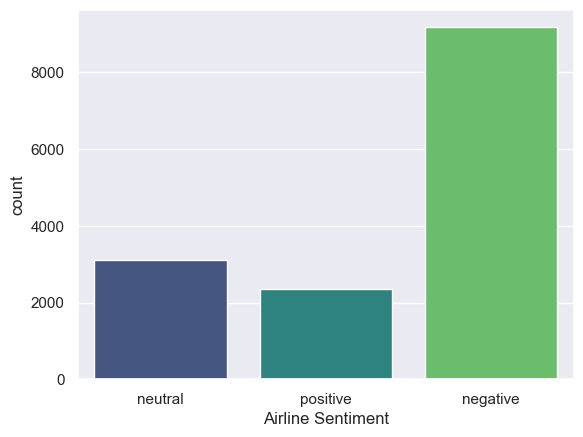

In [7]:
sns.countplot(df,x="airline_sentiment",palette='viridis')

plt.xlabel("Airline Sentiment")

plt.ylabel("count")

plt.show()

In [8]:
df=df[df["airline_sentiment"] != 'neutral']

df['target']=df["airline_sentiment"].map({'positive' :1,'negative' : 0})

print("no of rows:", df.shape[0])



no of rows: 11541


In [9]:
texts=df['text'].tolist()

predictions=classifier(texts)

predictions[:5]

[{'label': 'POSITIVE', 'score': 0.607088029384613},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854251742362976},
 {'label': 'POSITIVE', 'score': 0.9553211331367493}]

In [ ]:
probs=pred['score'] if pred['label'].startswith('P') else 1 - pred['score'] for pred in predictions]



In [ ]:
preds=np.array([1 if pred['label'].startswith('P') else 0 for pred in predictions]
               

In [ ]:
print(f"Accuracy:" {round(np.mean(df['target']==preds)*100,2)},%")



In [ ]:
cm=confusion_matrix(df['target'],preds,normalizer=True)


In [ ]:
def plot_confusion_matrix(confusion_matrix,labels):
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1.7)

    sns.heatmap(confusion_matrix,fmt='g',annot=True,cmap='Blues',xticklabels=labels,yticlabels=labels)

    plt.title("Confusion Matrix")
    plt.xlabel("predicted_values")
    plt.ylabel("Actual_values")
    plt.show()

    

In [ ]:
plot_confusion_matrix(cm,["Negative","Positive"])

In [ ]:
print(f"roc auc score" : {roc_auc_score(df['target'],probs)}")



In [ ]:
#roc auc curver

#roc auc curve represents the models ability to distinguish b/w the positive or negative binary classifiers;

#if higher ROC means models have better ability to rank positives than negative;

#ROC = Recieiver operative characterstic curve;




In [10]:
#text generation in huggin face


In [15]:
poems=pd.read_csv("robert_frost_collection.csv")

poems.head(5)

,Name,Content,Collection,Year of Publication
0,NaN,NaN,NaN,NaN
1,Stopping by Woods on a Snowy Evening,Whose woods these are I think I know. \nHis ...,New Hampshire,1923.0
2,Fire and Ice,"Some say the world will end in fire,\nSome say...",New Hampshire,1923.0
3,The Aim was Song,Before man came to blow it right\nThe wind onc...,New Hampshire,1923.0
4,The Need of Being Versed in Country Things,The house had gone to bring again\nTo the midn...,New Hampshire,1923.0


In [16]:
content=poems['Content'].dropna().tolist()

In [18]:
lines=[]
for poem in content:
    for line in poem.split("\n"):
        lines.append(line.rstrip())
    

In [20]:
lines = [line for line in lines if len(lines)>0 ]

lines[:5]

['Whose woods these are I think I know.',
 'His house is in the village though;',
 'He will not see me stopping here',
 'To watch his woods fill up with snow.',
 'My little horse must think it queer']

In [23]:
gen=pipeline('text-generation')


No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [24]:
lines[0]

'Whose woods these are I think I know.'

In [25]:
gen(lines[0],max_length=20)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Whose woods these are I think I know.\n\nThat leaves us to wonder what kind of animal we are.\n\n\nIt is one thing to look at a group of young white males, but what if we found some other group of young African men?\n\n\nI really don't know. I think I know, so I am not sure what I am doing here. I think I found some animals in the wild, but I never felt like I was seeing the world from the animal's perspective.\n\nI have been doing this for 20 years. I've studied animals for a long time. I have been able to look into this, and now I am curious. I am going to explore this question. And if I do find some other animals out there, what would they be like?\n\nI am going to answer that question.\n\nThank you so much for your time,\n\nErik."}]

In [27]:
gen(lines[1],max_length=30,num_return_sequences=2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'His house is in the village though; he is the only living person who does not have an apartment.\n\nHe lives in a small flat with his mother.\n\n"I don\'t know where I am, but I can\'t tell anyone," he said.\n\nHe is the only person who is able to read.\n\nHe has been in a coma for three days.\n\n"I can\'t even walk. I don\'t know where I am," he said.\n\nHis mother, who is in the same coma as him, is still there.\n\n"It\'s hard to get out of bed with someone who\'s so weak," he said.\n\nHis mother has been taken to the hospital.\n\n"She is in the intensive care unit at Rotherham Hospital. She\'s so poor she has to stay there for three days, so she can\'t walk," he said.\n\n"She is sick, so it\'s like she\'s in a coma," he said.\n\n"I cannot get out of bed and my sister is at the hospital.\n\n"My mother is still there, but she has been waiting for me the whole time I\'ve been here, waiting for me to come back and to come back and to come back again and'},
 {'genera

In [28]:
import textwrap

In [29]:
def wrap(x):
    return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)

In [33]:
out=gen(lines[0],max_length=30)

print(wrap(out[0]["generated_text"]))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Whose woods these are I think I know.  A small town.  A town with a
nice old millhouse.  A town with some strange trees.  A town of young
women.  A town of children.  A town with the town of the wild beasts.
A town of the young lady.  A town of the little girls.  A town of the
little girls.  A town of the little girls.  A town of the little
girls.  A town of the little girls.  A town of the big boys.  A town
of the big boys.  A town of the big boys.  A town of the big boys.  A
town of the big boys.  A town of the big boys.  A town of the big
boys.  A town of the big boys.  A town of the big boys.  A town of the
big boys.  A town of the big boys.  A town of the big boys.  A town of
the big boys.  A town of the big boys.  A town of the big boys.  A
town of the big boys.  A town of the big boys.  A town of the big
boys.  A town of the big boys.  A town of the big boys.  A town of the
big boys.  A town of the big boys.  A town of the big boys.  A town of
the big boys.  A town of the big


In [43]:
prompt="transformers have a wide vierity of applications in nlp"

out=gen(prompt,max_length=100)

print(wrap(out[0]['generated_text']))
           

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


transformers have a wide vierity of applications in nlp_s.

The main
difference between the two is that the s_addr object is a pointer.
The s_addr struct is a pointer to the address of the s_addr object in
the nlp_s implementation.

The ln_addr struct is a pointer to the
address of the ln_addr object in the nlp_s implementation.

The
wl_addr struct contains the address of the wl_addr object in the nlp_s
implementation.

The s_addr struct is a pointer to the address of the
s_addr object in the nlp_s implementation.

The ln_addr struct
contains the address of the ln_addr object in the nlp_s
implementation.

The ln_addr struct is a pointer to the address of the
ln_addr object in the nlp_s implementation.

The wl_addr struct
contains the address of the wl_addr object in the nlp_s
implementation.

The ln_addr struct contains the address of the
ln_addr object in the nlp_s implementation.

The wl_addr struct
contains the address of the ln_addr object


In [ ]:
#rstrip = removes the right ned of the char but not change the original input

# append = adds the single number or string to the list;

#append can adds an element to the last as it is

#list1=[1,2,3]

#list2=[5,6]
#list1.append("5")

#print(list1)


#list1.extend(list2)

#print(list1)


# where extend can adds the elements if u want more" 




In [44]:
print("OK done")


OK done
